# Income Map for LA

I am exploring median income data for the City of LA! I will be attempting to create a choropleth map of income by census tract. Follow along with me as I explore this data in Jupyterhub Notebook. 

**Author: Miranda Mead-Newton**
in group with Arturo Jacobo

First I will start by importing the necessary libraries. 

In [113]:
# for general data wrangling tasks
import pandas as pd

# to read and visualize spatial data
import geopandas as gpd

# to provide basemaps 
import contextily as ctx

# to give more power to your figures (plots)
import matplotlib.pyplot as plt

Now, I'll import my data. I got my data from Census Reporter. It is median household income in the past 12 months (in 2019 inflation-adjusted dollars) for the year 2019 for census tracts in the City of LA. 

In [114]:
# load a data file
# note the relative filepath! where is this file located?
income = gpd.read_file('data/acs2019_5yr_B19013_14000US06037185320.geojson')

I can get a basic look at the data by using `.shape`, `.head()`, and `info` which can give me a basic feel for my data.

In [115]:
income.shape

(1005, 5)

In [116]:
income.head()

,geoid,name,B19013001,"B19013001, Error",geometry
0,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",63534.0,16806.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
1,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",90389.0,9796.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
2,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",44083.0,9483.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
3,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",43713.0,4639.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."
4,14000US06037101300,"Census Tract 1013, Los Angeles, CA",81776.0,11857.0,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782..."


In [118]:
income.info

<bound method DataFrame.info of                    geoid                                   name  B19013001  \
0     14000US06037101110  Census Tract 1011.10, Los Angeles, CA    63534.0   
1     14000US06037101122  Census Tract 1011.22, Los Angeles, CA    90389.0   
2     14000US06037101210  Census Tract 1012.10, Los Angeles, CA    44083.0   
3     14000US06037101220  Census Tract 1012.20, Los Angeles, CA    43713.0   
4     14000US06037101300     Census Tract 1013, Los Angeles, CA    81776.0   
...                  ...                                    ...        ...   
1000  14000US06037980026  Census Tract 9800.26, Los Angeles, CA        NaN   
1001  14000US06037980028  Census Tract 9800.28, Los Angeles, CA        NaN   
1002  14000US06037980031  Census Tract 9800.31, Los Angeles, CA        NaN   
1003  14000US06037990200     Census Tract 9902, Los Angeles, CA        NaN   
1004      16000US0644000                        Los Angeles, CA    62142.0   

      B19013001, Error         

The data includes the geoid, census tract, median income, and geometry. I'm not sure what the "B19013001, Error" column is, but we deleted it in class so I'm going to assume it's not relevant. 

Next I will create a super basic map of my data just to get a feel for the area it cover and make sure it resembles the City of LA.

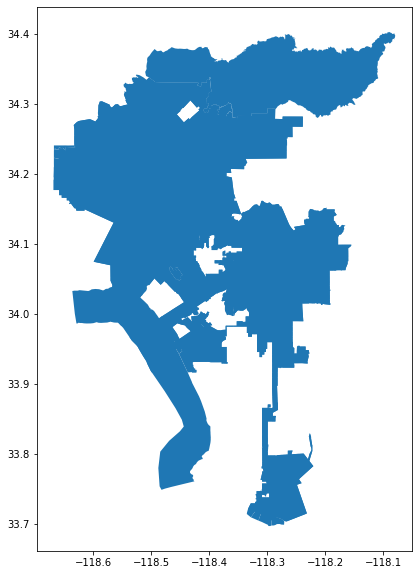

In [117]:
income.plot(figsize=(10,10))

That looks like the City of LA! Except for the part that's in the ocean--I'm not sure what the deal is with that! Sailors?

Next, I will rename some of the columns. First I'll get a list of the columns using the `list()` function

In [120]:
list(income)

['geoid', 'name', 'B19013001', 'B19013001, Error', 'geometry']

Out of those columns, I'll keep everything but the 'B19013001, Error' (which is maybe margin of error?)

In [121]:
columns_to_keep = ['geoid','name','B19013001','geometry']

Next, I'll overwrite the 'income' variable with the new version that has less columns.

In [122]:
income = income[columns_to_keep]

In [123]:
list(income)

['geoid', 'name', 'B19013001', 'geometry']

I've successfully dropped that column! Now, I'll rename 'B19013001' with 'median income'.

In [124]:
income.columns = ['geoid', 'name', 'median income', 'geometry']

Hmm I went through all my steps in the process and could not figure out what was wrong with my map. It turns out I had one row that was a total of all of the data. We talked about it in class, but mine was hiding at the end of the data and not the begining. 

In [125]:
income.tail()

,geoid,name,median income,geometry
1000,14000US06037980026,"Census Tract 9800.26, Los Angeles, CA",NaN,"MULTIPOLYGON (((-118.35173 34.28034, -118.3517..."
1001,14000US06037980028,"Census Tract 9800.28, Los Angeles, CA",NaN,"MULTIPOLYGON (((-118.45246 33.94315, -118.4464..."
1002,14000US06037980031,"Census Tract 9800.31, Los Angeles, CA",NaN,"MULTIPOLYGON (((-118.29105 33.75378, -118.2905..."
1003,14000US06037990200,"Census Tract 9902, Los Angeles, CA",NaN,"MULTIPOLYGON (((-118.63598 34.03255, -118.6325..."
1004,16000US0644000,"Los Angeles, CA",62142.0,"MULTIPOLYGON (((-118.66818 34.18987, -118.6681..."


1004 is the one that's been messing me up! I'll drop it now.

In [126]:
income = income.drop([1004])

In [127]:
income.tail()

,geoid,name,median income,geometry
999,14000US06037980024,"Census Tract 9800.24, Los Angeles, CA",150250.0,"MULTIPOLYGON (((-118.51849 34.18389, -118.5184..."
1000,14000US06037980026,"Census Tract 9800.26, Los Angeles, CA",NaN,"MULTIPOLYGON (((-118.35173 34.28034, -118.3517..."
1001,14000US06037980028,"Census Tract 9800.28, Los Angeles, CA",NaN,"MULTIPOLYGON (((-118.45246 33.94315, -118.4464..."
1002,14000US06037980031,"Census Tract 9800.31, Los Angeles, CA",NaN,"MULTIPOLYGON (((-118.29105 33.75378, -118.2905..."
1003,14000US06037990200,"Census Tract 9902, Los Angeles, CA",NaN,"MULTIPOLYGON (((-118.63598 34.03255, -118.6325..."


Okay, as you can see, it's been dropped!

Now, I can make a histogram of my data. It will be interesting to see what income in LA looks like. 

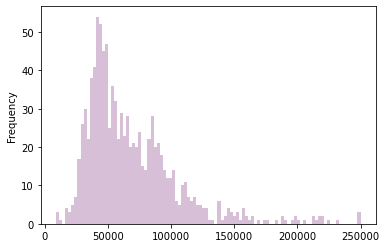

In [128]:
income['median income'].plot.hist(bins=100,color="thistle")

As is typical for income data, the plot is positively skewed. I colored the graph in "thistle" my new favorite color. 

Next, using `income.plot` I'll make a choropleth map of my data. I used Natural Breaks to break it up. And assigned it the color "magma".

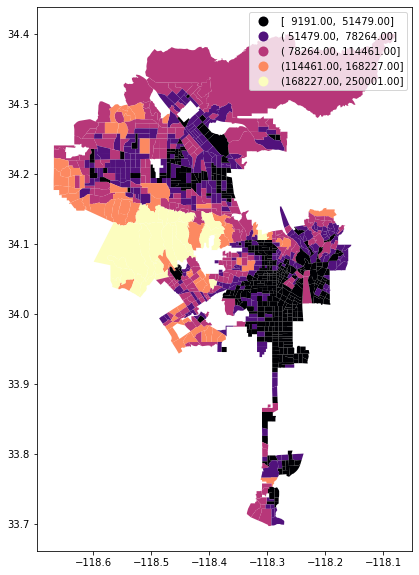

In [129]:
income.plot(figsize=(10,10), cmap='magma', column='median income', legend=True, scheme='NaturalBreaks')

Great! As you can see, the wealthier neighorhoods are in yellow and the lowest income are in dark purple. 

Okay, next I'm going to make one of the maps we made in class where we graphed only certain neighborhoods. First I'll sort by using `sort_value` to put the median incomes in order. I'll save this as a new variable "income_sorted"

In [130]:
income_sorted = income.sort_values(by='median income',ascending = False)

Now, I'll see what this looks like using `.head()`

In [131]:
income_sorted[['geoid','median income']].head(10)

,geoid,median income
831,14000US06037262303,250001.0
832,14000US06037262400,250001.0
340,14000US06037141700,250001.0
994,14000US06037980019,231250.0
833,14000US06037262501,224962.0
839,14000US06037264000,220417.0
338,14000US06037141500,219698.0
827,14000US06037262100,217462.0
838,14000US06037262802,217292.0
829,14000US06037262301,215750.0


Next, I'll graph the 20 wealthiest census tracts in LA using `.plot`

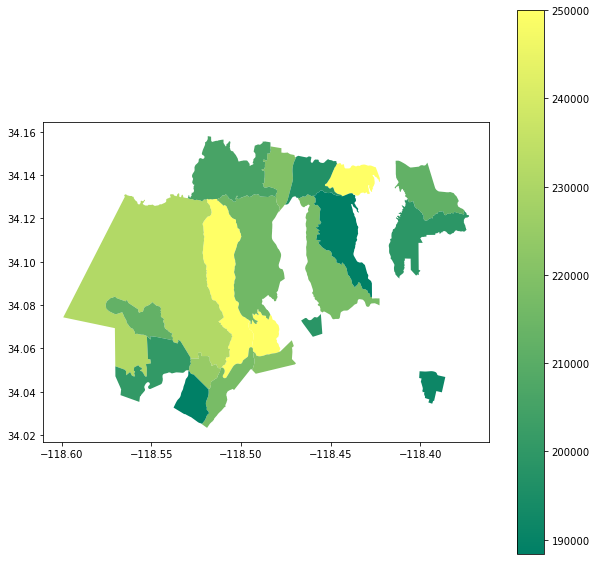

In [136]:
income_sorted.head(20).plot(cmap='summer',figsize=(10,10),column='median income',legend=True)


As you can see, this is like a zoomed in version of the yellow part of the larger map. Not shocking that the hills are the wealthiest part of LA!